# Heart data analysis'

in this lab, we have a frog heart pumping fluid through a tube. We know the displacement of the water level, and we wish to calculate the pressure.

In [31]:
data <- read.csv("data.csv")
data

totalvol,diastolic,systolic
<dbl>,<dbl>,<dbl>
0.2,0.08,0.18
0.4,0.11,0.31
0.6,0.13,0.44
0.8,0.15,0.57
1.0,0.19,0.66
1.2,0.20,0.73
1.4,0.22,0.77
1.6,0.27,0.80
1.8,0.33,0.83


In [32]:
data["volume atrium diastole"] <- data["totalvol"] - data["diastolic"]
data["volume atrium diastole"]

volume atrium diastole
<dbl>
0.12
0.29
0.47
0.65
0.81
1.00
1.18
1.33
1.47


In [33]:
data["volume atrium systole"] <- data["totalvol"] - data["systolic"]
data["volume atrium systole"]

volume atrium systole
<dbl>
0.02
0.09
0.16
0.23
0.34
0.47
0.63
0.80
0.97


Now we wish to calculate pressure. We know that 1ml is 5.7cm of h20 (from the video)

In [34]:
data["pressure diastole"] <- data["diastolic"] * 5.7
data["pressure diastole"]

pressure diastole
<dbl>
0.456
0.627
0.741
0.855
1.083
1.140
1.254
1.539
1.881


In [35]:
data["pressure systole"] <- data["systolic"] * 5.7
data["pressure systole"]

pressure systole
<dbl>
1.026
1.767
2.508
3.249
3.762
4.161
4.389
4.560
4.731


# Final

Finally, our data looks like this

In [36]:
data

totalvol,diastolic,systolic,volume atrium diastole,volume atrium systole,pressure diastole,pressure systole
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2,0.08,0.18,0.12,0.02,0.456,1.026
0.4,0.11,0.31,0.29,0.09,0.627,1.767
0.6,0.13,0.44,0.47,0.16,0.741,2.508
0.8,0.15,0.57,0.65,0.23,0.855,3.249
1.0,0.19,0.66,0.81,0.34,1.083,3.762
1.2,0.20,0.73,1.00,0.47,1.140,4.161
1.4,0.22,0.77,1.18,0.63,1.254,4.389
1.6,0.27,0.80,1.33,0.80,1.539,4.560
1.8,0.33,0.83,1.47,0.97,1.881,4.731


# Plotting the data.

First we would like to plot pressure vs volume across both systole and diastoel

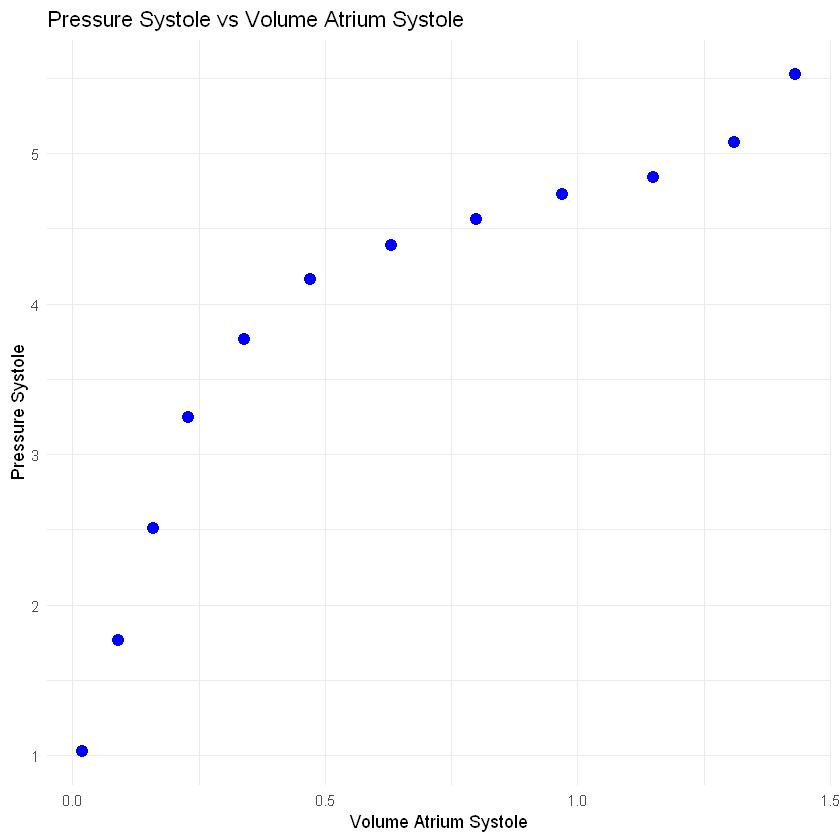

In [37]:
library(ggplot2)

ggplot(data = data, aes(x = `volume atrium systole`, y = `pressure systole`)) +
  geom_point(color = "blue", size = 3) +
  labs(title = "Pressure Systole vs Volume Atrium Systole",
       x = "Volume Atrium Systole",
       y = "Pressure Systole") +
  theme_minimal() 

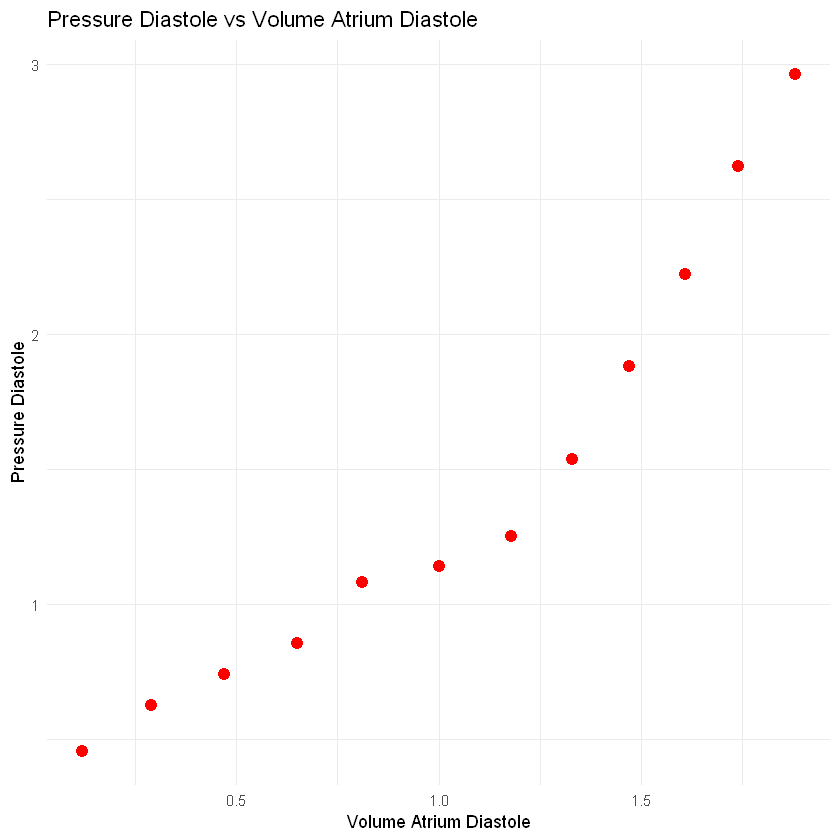

In [38]:
ggplot(data = data, aes(x = `volume atrium diastole`, y = `pressure diastole`)) +
  geom_point(color = "#ff0000", size = 3) +
  labs(title = "Pressure Diastole vs Volume Atrium Diastole",
       x = "Volume Atrium Diastole",
       y = "Pressure Diastole") +
  theme_minimal() 

# Compliance

$$C = \frac{\triangle V}{\triangle P}$$

Lets get our grpahs in

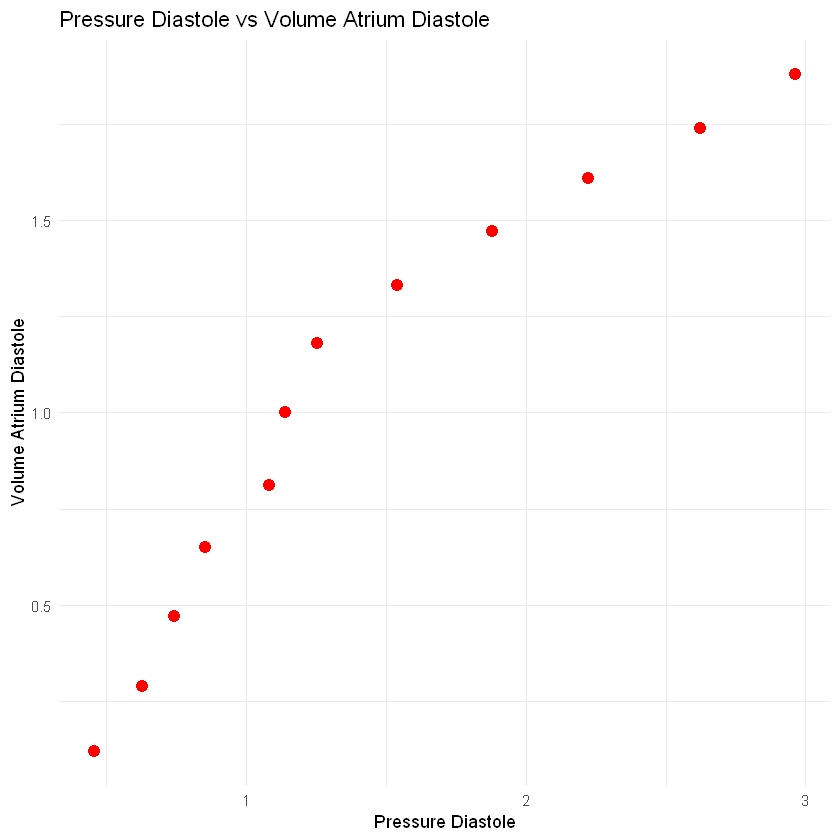

In [42]:
ggplot(data = data, aes(y = `volume atrium diastole`, x = `pressure diastole`)) +
  geom_point(color = "#ff0000", size = 3) +
  labs(title = "Pressure Diastole vs Volume Atrium Diastole",
       y = "Volume Atrium Diastole",
       x = "Pressure Diastole") +
  theme_minimal() 

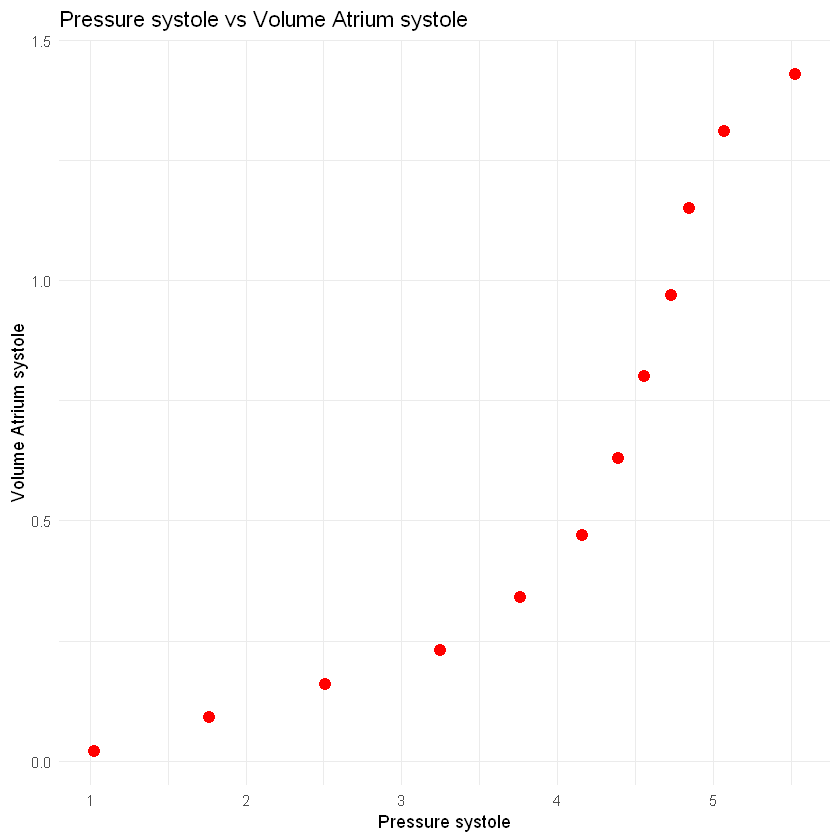

In [43]:
ggplot(data = data, aes(y = `volume atrium systole`, x = `pressure systole`)) +
  geom_point(color = "#ff0000", size = 3) +
  labs(title = "Pressure systole vs Volume Atrium systole",
       y = "Volume Atrium systole",
       x = "Pressure systole") +
  theme_minimal() 

Lets run a linear regression, and we have the slope of the line!!

In [49]:
model <- lm(`volume atrium diastole`~`pressure diastole` , data = data)
summary(model)


Call:
lm(formula = `volume atrium diastole` ~ `pressure diastole`, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24358 -0.13188  0.01387  0.13692  0.26801 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.05020    0.11022   0.455    0.659    
`pressure diastole`  0.68724    0.06704  10.251 1.27e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1805 on 10 degrees of freedom
Multiple R-squared:  0.9131,	Adjusted R-squared:  0.9044 
F-statistic: 105.1 on 1 and 10 DF,  p-value: 1.266e-06


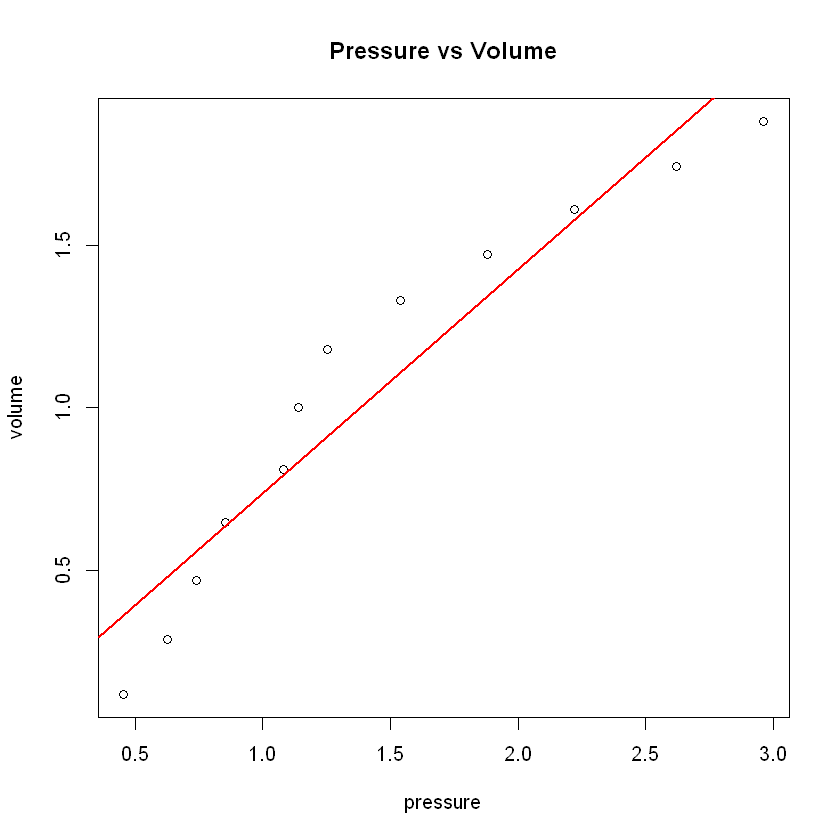

In [51]:
plot(data$`pressure diastole`, data$`volume atrium diastole`, main = "Pressure vs Volume", xlab = "pressure", ylab = "volume")
abline(model, col = "red", lwd = 2)
eq <- paste0("y = ", round(coef(model)[1], 4), " + ", round(coef(model)[2], 4), "x")
text(400, .8, eq, pos = 3, offset = 0.5)

so our compliance value is equal to .68724

the line does not seem to fit it well though, we could linearize it, but lets ignore it for now